# Problem Statement


**Vehicle Loan Default Prediction**
Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets:
Loanee Information (Demographic data like age, Identity proof etc.)
Loan Information (Disbursal details, loan to value ratio etc.)
Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)
Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.  

In [2]:
#import lib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
#import the traning data 

train = pd.read_csv("train_aox2J.csv")

In [4]:
#data 

train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [6]:
train1 = train.drop("UniqueID",axis=1)

In [7]:
print(train1["Employment.Type"].value_counts())
print(train1["loan_default"].value_counts())

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64
0    182543
1     50611
Name: loan_default, dtype: int64


(array([182543.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  50611.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

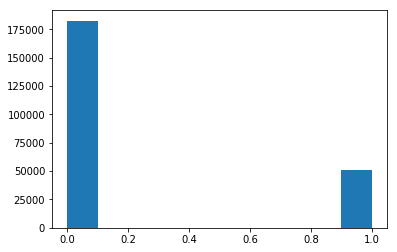

In [8]:
plt.hist(train1["loan_default"])

dependent variable is not balanced 

In [9]:
# Visualization of different feature with respect to loan_dafault

In [10]:
def bar_chart(feature):
    paid = train1[train1["loan_default"]==0][feature].value_counts()
    default = train1[train1["loan_default"]==1][feature].value_counts()
    df = pd.DataFrame([paid,default])
    df.index = ['Paid','Default']
    df.plot(kind='bar',stacked =True,figsize=(10,5))

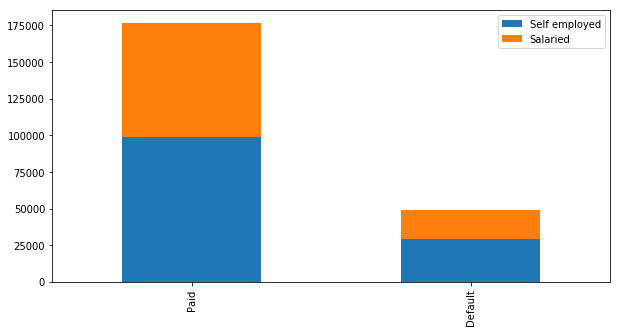

In [11]:
bar_chart('Employment.Type')


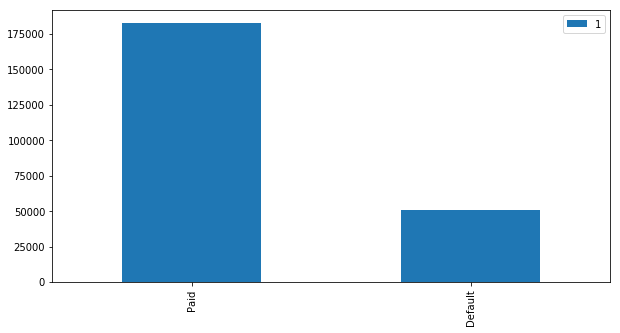

In [12]:
bar_chart("MobileNo_Avl_Flag")

In [13]:
train1["MobileNo_Avl_Flag"].value_counts()

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

In [14]:
#drop this 

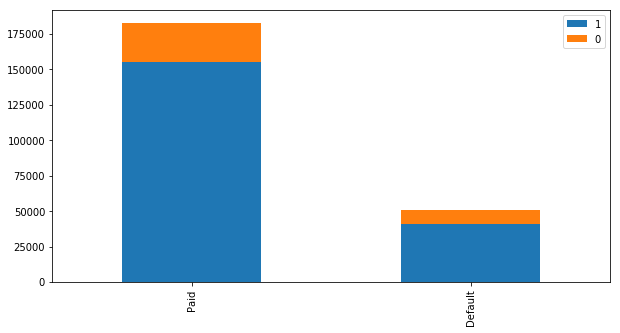

In [15]:
bar_chart("Aadhar_flag")

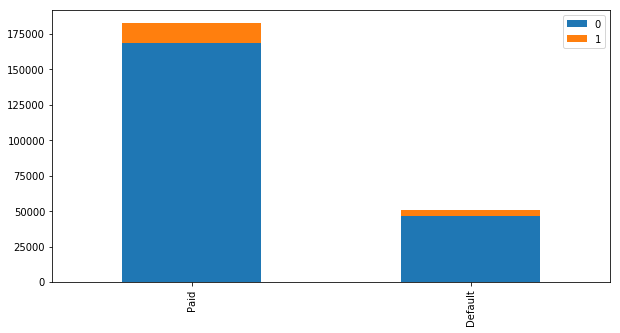

In [16]:
bar_chart("PAN_flag")

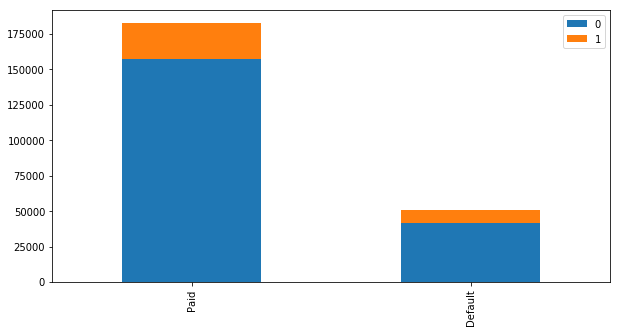

In [17]:
bar_chart("VoterID_flag")

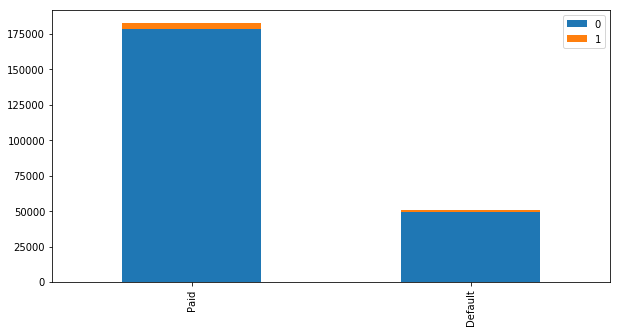

In [18]:
bar_chart("Driving_flag")

In [19]:
train1["Passport_flag"].value_counts()

0    232658
1       496
Name: Passport_flag, dtype: int64

In [20]:
#train1["PERFORM_CNS.SCORE.DESCRIPTION"].value_counts()

#data = pd.get_dummies(data=train1, columns=["PERFORM_CNS.SCORE.DESCRIPTION"])

In [23]:
#Employment.Type(Garima)
train1.replace(r'\s+', np.nan, regex=True)
train1["Employment.Type"]=train1["Employment.Type"].fillna('Salaried')
train1["Employment.Type"].value_counts()

data = pd.get_dummies(data=train1, columns=["Employment.Type"])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                   

In [25]:
#MobileNo_Avl_Flag(Garima)
data=data.drop('MobileNo_Avl_Flag',axis=1)

In [26]:
data=data.drop('PERFORM_CNS.SCORE.DESCRIPTION',axis=1)

In [27]:
#Handing the date of birth column(Garima)
data['year_of_birth']=[d.split('-')[2] for d in data["Date.of.Birth"]]
data['year_of_birth']= '19' + data['year_of_birth'].astype(str)
data['year_of_birth']=data['year_of_birth'].replace('1900', '2000')

    
data['year_of_birth'][1300]
data.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,State_ID,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Salaried,Employment.Type_Self employed,year_of_birth
0,50578,58400,89.55,67,22807,45,1441,01-01-84,03-08-18,6,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1,0,1984
1,47145,65550,73.23,67,22807,45,1502,31-07-85,26-09-18,6,...,0,0,1,1yrs 11mon,1yrs 11mon,0,1,0,1,1985
2,53278,61360,89.63,67,22807,45,1497,24-08-85,01-08-18,6,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,1,1985
3,57513,66113,88.48,67,22807,45,1501,30-12-93,26-10-18,6,...,0,0,0,0yrs 8mon,1yrs 3mon,1,1,0,1,1993
4,52378,60300,88.39,67,22807,45,1495,09-12-77,26-09-18,6,...,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0,1,1977


In [28]:
data.dtypes

import datetime
#converting yr into float(Garima)
data['year_of_birth']=data['year_of_birth'].astype('float64')
datetoday=datetime.date.today().year
datetoday
data['age']= datetoday - data['year_of_birth'] #current year = 2018
data.head()



,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,State_ID,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Salaried,Employment.Type_Self employed,year_of_birth,age
0,50578,58400,89.55,67,22807,45,1441,01-01-84,03-08-18,6,...,0,0,0yrs 0mon,0yrs 0mon,0,0,1,0,1984.0,35.0
1,47145,65550,73.23,67,22807,45,1502,31-07-85,26-09-18,6,...,0,1,1yrs 11mon,1yrs 11mon,0,1,0,1,1985.0,34.0
2,53278,61360,89.63,67,22807,45,1497,24-08-85,01-08-18,6,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,1,1985.0,34.0
3,57513,66113,88.48,67,22807,45,1501,30-12-93,26-10-18,6,...,0,0,0yrs 8mon,1yrs 3mon,1,1,0,1,1993.0,26.0
4,52378,60300,88.39,67,22807,45,1495,09-12-77,26-09-18,6,...,0,0,0yrs 0mon,0yrs 0mon,1,1,0,1,1977.0,42.0


In [29]:
data=data.drop('year_of_birth',axis=1)
data=data.drop('Date.of.Birth',axis=1)
data.head()


,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,DisbursalDate,State_ID,Employee_code_ID,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Salaried,Employment.Type_Self employed,age
0,50578,58400,89.55,67,22807,45,1441,03-08-18,6,1998,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1,0,35.0
1,47145,65550,73.23,67,22807,45,1502,26-09-18,6,1998,...,0,0,1,1yrs 11mon,1yrs 11mon,0,1,0,1,34.0
2,53278,61360,89.63,67,22807,45,1497,01-08-18,6,1998,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,1,34.0
3,57513,66113,88.48,67,22807,45,1501,26-10-18,6,1998,...,0,0,0,0yrs 8mon,1yrs 3mon,1,1,0,1,26.0
4,52378,60300,88.39,67,22807,45,1495,26-09-18,6,1998,...,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0,1,42.0


In [30]:


today_date = datetime.date.today()
print(today_date)


2019-04-19


In [31]:
data["DisbursalDate_day"] = today_date - pd.to_datetime(data["DisbursalDate"], format='%d-%m-%y', errors='ignore')

In [32]:
data = data.drop("DisbursalDate",axis=1)

In [33]:
data.DisbursalDate_day = data['DisbursalDate_day'].astype('timedelta64[D]').astype(int)

In [34]:
import re
temp_list = []
for i, row in data.iterrows():
    k = (re.findall('\d+', row["CREDIT.HISTORY.LENGTH"] ))
    temp=float(k[0]+"."+k[1])
    temp_list.append(temp)
    

In [35]:
df = pd.DataFrame({'CREDIT.HISTORY.LENGTH.Days':temp_list})
data_with_df = pd.concat([df,data],axis=1)

In [36]:
data_with_df.head()

,CREDIT.HISTORY.LENGTH.Days,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Salaried,Employment.Type_Self employed,age,DisbursalDate_day
0,0.00,50578,58400,89.55,67,22807,45,1441,6,1998,...,0,0,0yrs 0mon,0yrs 0mon,0,0,1,0,35.0,259
1,1.11,47145,65550,73.23,67,22807,45,1502,6,1998,...,0,1,1yrs 11mon,1yrs 11mon,0,1,0,1,34.0,205
2,0.00,53278,61360,89.63,67,22807,45,1497,6,1998,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,1,34.0,261
3,1.30,57513,66113,88.48,67,22807,45,1501,6,1998,...,0,0,0yrs 8mon,1yrs 3mon,1,1,0,1,26.0,175
4,0.00,52378,60300,88.39,67,22807,45,1495,6,1998,...,0,0,0yrs 0mon,0yrs 0mon,1,1,0,1,42.0,205


In [37]:
temp_list1 = []
for j, row in data_with_df.iterrows():
    l = (re.findall('\d+', row["AVERAGE.ACCT.AGE"] ))
    temp1=float(l[0]+"."+l[1])
    temp_list1.append(temp1)
    

In [38]:
df3 = pd.DataFrame({'AVERAGE.ACCT.AGE.Days':temp_list1})
train_final=pd.concat([df3,data_with_df],axis=1)

In [39]:
train_final1=pd.concat([df3,data_with_df],axis=1)

In [40]:
train_final.head()

,AVERAGE.ACCT.AGE.Days,CREDIT.HISTORY.LENGTH.Days,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Salaried,Employment.Type_Self employed,age,DisbursalDate_day
0,0.00,0.00,50578,58400,89.55,67,22807,45,1441,6,...,0,0,0yrs 0mon,0yrs 0mon,0,0,1,0,35.0,259
1,1.11,1.11,47145,65550,73.23,67,22807,45,1502,6,...,0,1,1yrs 11mon,1yrs 11mon,0,1,0,1,34.0,205
2,0.00,0.00,53278,61360,89.63,67,22807,45,1497,6,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,1,34.0,261
3,0.80,1.30,57513,66113,88.48,67,22807,45,1501,6,...,0,0,0yrs 8mon,1yrs 3mon,1,1,0,1,26.0,175
4,0.00,0.00,52378,60300,88.39,67,22807,45,1495,6,...,0,0,0yrs 0mon,0yrs 0mon,1,1,0,1,42.0,205


In [41]:
train_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
AVERAGE.ACCT.AGE.Days                  233154 non-null float64
CREDIT.HISTORY.LENGTH.Days             233154 non-null float64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                           233154 non-null int64
Driving_flag                 

In [42]:
train_final = train_final1.drop("AVERAGE.ACCT.AGE",axis=1)

In [43]:
train_final_df = train_final.drop("CREDIT.HISTORY.LENGTH",axis=1)

In [44]:
train_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 39 columns):
AVERAGE.ACCT.AGE.Days                  233154 non-null float64
CREDIT.HISTORY.LENGTH.Days             233154 non-null float64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                           233154 non-null int64
Driving_flag                 

In [45]:
#Treat manufacture ID

train_final_df_1 = pd.get_dummies(data=train_final_df, columns=["manufacturer_id"])

In [46]:
train_final_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 49 columns):
AVERAGE.ACCT.AGE.Days                  233154 non-null float64
CREDIT.HISTORY.LENGTH.Days             233154 non-null float64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
Current_pincode_ID                     233154 non-null int64
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                           233154 non-null int64
Driving_flag                           233154 non-null int64
Passport_flag                

In [47]:
train_final_df_1["State_ID"].value_counts()

4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
20      185
21      156
22       76
Name: State_ID, dtype: int64

In [48]:
train_final_df_2 = pd.get_dummies(data=train_final_df, columns=["State_ID"])

In [49]:
train_final_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 60 columns):
AVERAGE.ACCT.AGE.Days                  233154 non-null float64
CREDIT.HISTORY.LENGTH.Days             233154 non-null float64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Employee_code_ID                       233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                           233154 non-null int64
Driving_flag                           233154 non-null int64
Passport_flag                

In [57]:
data5=train_final_df_2.drop('branch_id',axis=1)
data5=data5.drop('supplier_id',axis=1)
data5=data5.drop('manufacturer_id',axis=1)
data5=data5.drop('Current_pincode_ID',axis=1)
data5=data5.drop('Employee_code_ID',axis=1)



# Running ML models

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [58]:
X = data5.drop(["loan_default"],axis=1)
y = data5["loan_default"]

In [64]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std =  sc.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std,y, train_size=0.7,test_size=0.3,random_state=100)

In [66]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [67]:
clf = RandomForestClassifier(n_estimators=500,random_state=100,max_depth=4)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [68]:
y_train_pred = clf.predict(X_train)

In [69]:
print("Training accuracy ",acc(y_train,y_train_pred))

y_test_pred = clf.predict(X_test)

print("Test accuracy ",acc(y_test,y_test_pred))

Training accuracy  0.7827911792999075
Test accuracy  0.7832501751326004


# Try XGBOOST

In [71]:
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [73]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [74]:
y_train_pred = model.predict(X_train)
print("Training accuracy ",acc(y_train,y_train_pred))

y_test_pred = model.predict(X_test)

print("Test accuracy ",acc(y_test,y_test_pred))


C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training accuracy  0.7831955737192645
Test accuracy  0.7834503266759117


C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
